In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

416 416


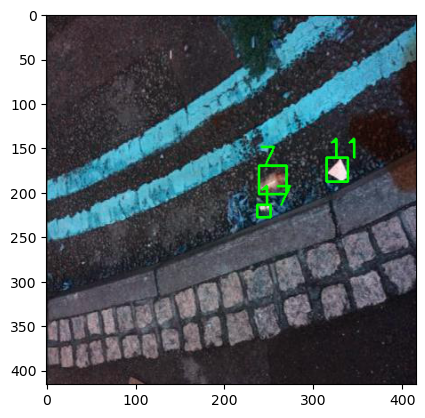

In [3]:
im = cv2.imread(r'C:\Users\isaac\dev\CV_Garbage_Detection\data\train\images\000000_JPG_jpg.rf.0c1d3ad769060ea39a27c74edac0375f.jpg')

with open(r"C:\Users\isaac\dev\CV_Garbage_Detection\data\train\labels\000000_JPG_jpg.rf.0c1d3ad769060ea39a27c74edac0375f.txt") as f:
    data = f.readlines()
    
bounding_boxes = []
labels = []
for line in data:
    line = line.strip().split()
    labels.append(int(line[0]))
    bounding_boxes.append([float(i) for i in line[1:]])
    

bounding_boxes = np.array(bounding_boxes)
labels = np.array(labels)

im_H, im_W = im.shape[:2]
for i in range(bounding_boxes.shape[0]):
    x_center = bounding_boxes[i][0] * im_W
    y_center = bounding_boxes[i][1] * im_H
    width = bounding_boxes[i][2] * im_W
    height = bounding_boxes[i][3] * im_H
    
    x_min = int(x_center - width/2)
    y_min = int(y_center - height/2)
    x_max = int(x_center + width/2)
    y_max = int(y_center + height/2)
    
    cv2.rectangle(im, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    cv2.putText(im, str(labels[i]), (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

plt.imshow(im)
print(im_H, im_W)